In [1]:
import sys
sys.path.append("../library")

In [2]:
from __future__ import print_function, division
"""This file contains a partial solution to a problem from
MacKay, "Information Theory, Inference, and Learning Algorithms."
    Exercise 3.15 (page 50): A statistical statement appeared in
    "The Guardian" on Friday January 4, 2002:
        When spun on edge 250 times, a Belgian one-euro coin came
        up heads 140 times and tails 110.  'It looks very suspicious
        to me,' said Barry Blight, a statistics lecturer at the London
        School of Economics.  'If the coin were unbiased, the chance of
        getting a result as extreme as that would be less than 7%.'
MacKay asks, "But do these data give evidence that the coin is biased
rather than fair?"

"""
import scipy
import pandas as pd
import math
import random
import numpy as np
from thinkbayes2 import Suite
import matplotlib.pyplot as plt
import thinkplot

# Hypothesis from data
refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/euro2.py

In [3]:
class Euro(Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        hypo: integer value of x, the probability of heads (0-100)
        data: string 'H' or 'T'
        """
        x = hypo / 100.0
        if data == 'H':
            return x
        else:
            return 1-x

In [4]:
class Euro2(Suite):
    """Represents hypotheses about the probability of heads."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        hypo: integer value of x, the probability of heads (0-100)
        data: tuple of (number of heads, number of tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x**heads * (1-x)**tails
        return like

In [5]:
def Version1():
    suite = Euro(range(101))
    heads, tails = 140, 110
    dataset = 'H' * heads + 'T' * tails
    for data in dataset:
        suite.Update(data)
    return suite

In [6]:
def Version2():
    suite = Euro(range(101))
    heads, tails = 140, 110
    dataset = 'H' * heads + 'T' * tails
    suite.UpdateSet(data)
    return suite

In [7]:
def Version3():
    suite = Euro2(range(101))
    heads, tails = 140, 110
    suite.Update((heads, tails))
    return suite

suite mean : 55.95238095238096


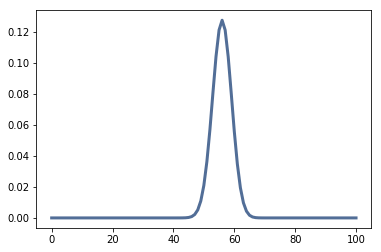

In [8]:
# analysis from data with true percentage
suite = Version3()
print("suite mean :", suite.Mean())
thinkplot.Pdf(suite)
thinkplot.Show(legend=False)

# Fair analysis without 50% in hypothesis

In [9]:
b_uniform = Euro(range(101))
b_uniform.Remove(50)
b_uniform.Normalize()
# heads, tails experiment setting
heads, tails = 140, 110

In [10]:
def SuiteLikelihood(suite, data):
    total = 0
    for hypo, prob in suite.Items():
#         print(hypo, prob)
        like = suite.Likelihood(data, hypo)
#         print(like)
        total += prob * like
    return total

In [11]:
suite_fair = Euro2(range(101))
fair_likelihood = suite_fair.Likelihood((heads, tails), 50)
print("fair likelihood:", fair_likelihood)

fair likelihood: 5.527147875260445e-76


In [12]:
suite = Euro2(range(101))
b_uniform_likelihood = SuiteLikelihood(suite, (heads, tails))
print("b uniform probability:", b_uniform_likelihood)
likelihood = suite.Update((heads, tails))
print("b uniform likelihood:", likelihood)

b uniform probability: 2.6088321798736822e-76
b uniform likelihood: 2.6088321798736822e-76


In [13]:
print("likelihood ratio P(D|B)/P(D|F):", likelihood/fair_likelihood)

likelihood ratio P(D|B)/P(D|F): 0.47200332590174304
